<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
Date     1235 non-null object
Open     1235 non-null float64
High     1235 non-null float64
Low      1235 non-null float64
Last     1235 non-null float64
Close    1235 non-null float64
Total    1235 non-null float64
Turn     1235 non-null float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


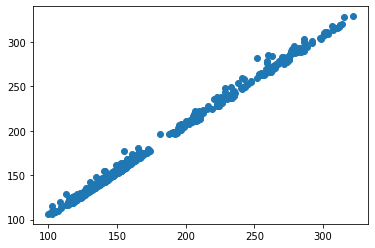

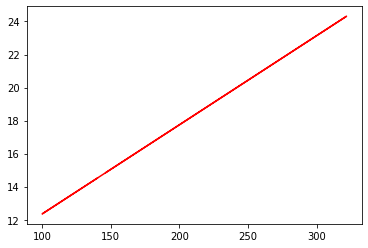

const   -0.736242
Low      1.034879
dtype: float64
const   -1.567632
Low      1.039002
dtype: float64


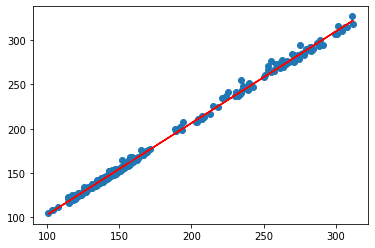

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
stock = pd.DataFrame(pd.read_csv("C:/Users/Shiv SJ/Desktop/Sem 6/CIP/stock.csv"))
stock.head()
stock.shape
stock.info()

stock.isnull().sum()*100/stock.shape[0]


X = stock['Low']
y = stock['High']


from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.head()
y_train.head()
plt.scatter(X_train,y_train)
plt.show()
plt.plot(X_train, 6.948 + 0.054 * X_train, 'r') 
#plt.plot(X_train,y_train,'y')
plt.show()

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.params)


X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)
y_pred.head()

lr = sm.OLS(y_test, X_test_sm).fit()

print(lr.params)

plt.scatter(X_test, y_test)
#plt.show()
plt.plot(X_test, y_pred, 'r')
plt.show()

In [3]:
print(stock.Low) 

0       206.85
1       205.90
2       216.15
3       225.75
4       221.05
         ...  
1230    157.70
1231    159.00
1232    155.85
1233    154.15
1234    155.20
Name: Low, Length: 1235, dtype: float64


In [4]:
price = stock['Low'] > 200
stock.Low[price]

0      206.85
1      205.90
2      216.15
3      225.75
4      221.05
        ...  
264    206.20
265    210.15
266    207.30
267    205.45
268    204.80
Name: Low, Length: 264, dtype: float64

In [5]:
print(stock.Turn[price])

0      10062.83
1       7407.06
2       3815.79
3       3960.27
4       3486.05
         ...   
264     9768.64
265    10349.32
266     7098.12
267    13393.10
268    12129.82
Name: Turn, Length: 264, dtype: float64


In [6]:
price = stock['Low'] == 206.85
print(stock.Turn[price])

0    10062.83
Name: Turn, dtype: float64


In [7]:
price = stock['Low'] == float(input())
print(stock.Turn[price])

206.85
0    10062.83
Name: Turn, dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression

prices = stock['Turn'].tolist()
low_price = stock['Low'].tolist()
high_price = stock['High'].tolist()

high_price = np.reshape(high_price, (len(high_price), 1))
low_price = np.reshape(low_price, (len(low_price), 1))
prices = np.reshape(prices, (len(prices), 1))

regressor = LinearRegression()
regressor.fit(low_price, prices)
regressor.fit(high_price, prices)

print('Enter the low value:')
price = stock['Low'] = float(input())

print('\nEnter the High value:')
price1 = stock['High'] = float(input())

print('\nAccuracy value for Low and Turn:')
print(regressor.score(low_price,prices))

print('\nAccuracy value for High and Turn:')
print(regressor.score(high_price,prices))


#print('\nThe Predicted value is')
preds = regressor.predict(prices)
preds = np.reshape(preds,(len(preds), 1))
#print(preds)

print('\nThe RMS value is')
rms = np.sqrt(np.mean(np.power((np.array(prices)-np.array(price)+np.array(price1)),2)))
print(rms)

Enter the low value:
204.34

Enter the High value:
250.43

Accuracy value for Low and Turn:
-0.009970129317547372

Accuracy value for High and Turn:
2.220446049250313e-16
[[113670.38818415]
 [ 84131.79490778]
 [ 44188.17634305]
 ...
 [ 57123.66374081]
 [ 37389.04009637]
 [ 31654.87570577]]

The RMS value is
7245.17810377051


In [16]:
import math
from sklearn.linear_model import LinearRegression

print('Enter the low value:')
price = stock['Low'] = float(input())

print('\nEnter the High value:')
price1 = stock['High'] = float(input())

def prediction(low_price): 
    
    prices = stock['Turn'].tolist()
    low_price = stock['Low'].tolist()
    high_price = stock['High'].tolist()

    high_price = np.reshape(high_price, (len(high_price), 1))
    low_price = np.reshape(low_price, (len(low_price), 1))
    prices = np.reshape(prices, (len(prices), 1))

    regressor = LinearRegression()
    regressor.fit(low_price, prices)
    regressor.fit(high_price, prices)
    
    print('\nAccuracy value for Low and Turn:')
    print(regressor.score(low_price,prices))

    print('\nAccuracy value for High and Turn:')
    print(regressor.score(high_price,prices)) 

  
    print('\nThe RMS value is')
    rms = np.sqrt(np.mean(np.power((np.array(prices)-np.array(price)+np.array(price1)),2)))
    print(rms)
  
    for i in range(0,1235):
        
        b = 6.948 + 0.054 * low_price 
        power  = pow(prices,i)
        power1 = pow(b,0) 
        power2 = pow(b,1)
        power3 = pow(rms,i)
        
        d=0
        c = prices[i]/low_price[i]
        prices[i] = d + c * low_price[i] + power3 
        power = power1 + power2  * low_price[i]
        power3 = prices[i] - power
        power3 = np.reshape(power3,(len(power3), 1))
        #print('\nThe predicted value is')
        #print(power3)
        


        
preds = prediction(prices)

#y_pred=regressor.predict(prices)

#print(y_pred)



Enter the low value:
230.23

Enter the High value:
349.45

Accuracy value for Low and Turn:
-0.06150586796489232

Accuracy value for High and Turn:
2.220446049250313e-16

The RMS value is
7294.72798726873
[[5600.8759034]
 [5600.8759034]
 [5600.8759034]
 ...
 [5600.8759034]
 [5600.8759034]
 [5600.8759034]]
[[10238.83389067]
 [10238.83389067]
 [10238.83389067]
 ...
 [10238.83389067]
 [10238.83389067]
 [10238.83389067]]
[[53212409.2441451]
 [53212409.2441451]
 [53212409.2441451]
 ...
 [53212409.2441451]
 [53212409.2441451]
 [53212409.2441451]]
[[3.88174771e+11]
 [3.88174771e+11]
 [3.88174771e+11]
 ...
 [3.88174771e+11]
 [3.88174771e+11]
 [3.88174771e+11]]
[[2.83162937e+15]
 [2.83162937e+15]
 [2.83162937e+15]
 ...
 [2.83162937e+15]
 [2.83162937e+15]
 [2.83162937e+15]]
[[2.0655966e+19]
 [2.0655966e+19]
 [2.0655966e+19]
 ...
 [2.0655966e+19]
 [2.0655966e+19]
 [2.0655966e+19]]
[[1.50679654e+23]
 [1.50679654e+23]
 [1.50679654e+23]
 ...
 [1.50679654e+23]
 [1.50679654e+23]
 [1.50679654e+23]]
[[1

 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]

[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]


 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
[[inf]
 [inf]
 [inf]
 ...
 [inf]